In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[28]:


import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from config import db_password2
import psycopg2
import pandas as pd
import tensorflow as tf


# In[29]:





In [2]:
engine = psycopg2.connect(
    database = "postgres",
    user = "postgres",
    password = db_password2,
    host = "js-ucbfinalprojectdb.c8s02fywjegc.us-east-2.rds.amazonaws.com",
#     host = "dataviz-db.csxrf9ti2aba.us-east-2.rds.amazonaws.com",
    port = 5432)
cursor = engine.cursor()


# In[30]:


#use Pandas to see all data in table
sql = """
SELECT "table_name","column_name", "data_type", "table_schema"
FROM INFORMATION_SCHEMA.COLUMNS
WHERE "table_schema" = 'public'
ORDER BY table_name  
"""
pd.read_sql(sql, con=engine)




,table_name,column_name,data_type,table_schema
0,bigquery_totals,devicecategory,character varying,public
1,bigquery_totals,medium,character varying,public
2,bigquery_totals,transactionrevenue,bigint,public
3,bigquery_totals,visitid,integer,public
4,bigquery_totals,sessionqualitydim,integer,public
...,...,...,...,...
123,websitetrafficsource,fullvisitorid,character varying,public
124,websitetrafficsource,source,character varying,public
125,websitetrafficsource,medium,character varying,public
126,websitetrafficsource,referralpath,character varying,public


In [3]:
# In[33]:


#Pull all info into pandas dataframe from RDS dB
sql = """
SELECT *
from bigquery_totals
--limit 100000
"""
bigquery_totals_df = pd.read_sql(sql,con = engine)
#plug NaN's as 0's
bigquery_totals_df = bigquery_totals_df.fillna(0)
print(bigquery_totals_df.shape)
bigquery_totals_df.head(n = 10)




(670577, 29)


,fullvisitorid,visitid,visitnumber,visitstarttime,date,socialengagementtype,channelgrouping,browser,operatingsystem,devicecategory,...,istruedirect,bounces,hits,newvisits,pageviews,sessionqualitydim,totaltransactionrevenue,transactionrevenue,transactions,visits
0,5900581127534318090,1498742314,1,1498742314,2017-06-29,Not Socially Engaged,Organic Search,Safari,iOS,mobile,...,False,0,21,1,16,0,0,0,0,1
1,8527893388611028582,1498787005,1,1498787005,2017-06-29,Not Socially Engaged,Organic Search,Chrome,Linux,desktop,...,False,0,21,1,17,0,0,0,0,1
2,3191020960668002679,1498756245,2,1498756245,2017-06-29,Not Socially Engaged,Referral,Chrome,Windows,desktop,...,True,0,21,0,14,0,0,0,0,1
3,0315225266694297526,1498772024,2,1498772024,2017-06-29,Not Socially Engaged,Organic Search,Chrome,Linux,desktop,...,True,0,21,0,14,0,0,0,0,1
4,2942636072870644291,1498770708,1,1498770708,2017-06-29,Not Socially Engaged,Referral,Chrome,Macintosh,desktop,...,False,0,21,1,16,0,0,0,0,1
5,8194022871905896477,1498760559,4,1498760559,2017-06-29,Not Socially Engaged,Referral,Chrome,Chrome OS,desktop,...,True,0,21,0,13,0,0,0,0,1
6,5862903247995019263,1498756702,3,1498756702,2017-06-29,Not Socially Engaged,Referral,Chrome,Macintosh,desktop,...,True,0,21,0,15,0,109800000,100800000,1,1
7,678346199445584745,1498786843,2,1498786843,2017-06-29,Not Socially Engaged,Organic Search,Chrome,Macintosh,desktop,...,True,0,21,0,19,0,24990000,16990000,1,1
8,3622727143547666142,1498722948,1,1498722948,2017-06-29,Not Socially Engaged,Organic Search,Safari,iOS,mobile,...,False,0,22,1,14,0,0,0,0,1
9,8228084117209284992,1498790091,2,1498790091,2017-06-29,Not Socially Engaged,Organic Search,Safari,iOS,mobile,...,True,0,22,0,20,0,0,0,0,1


In [44]:
# In[34]:



#Drop in Machine Learning libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics




In [5]:
# In[35]:


bigquery_totals_df.dtypes




fullvisitorid              object
visitid                     int64
visitnumber                 int64
visitstarttime              int64
date                       object
socialengagementtype       object
channelgrouping            object
browser                    object
operatingsystem            object
devicecategory             object
continent                  object
subcontinent               object
country                    object
region                     object
metro                      object
city                       object
referralpath               object
source                     object
medium                     object
istruedirect                 bool
bounces                     int64
hits                        int64
newvisits                   int64
pageviews                   int64
sessionqualitydim           int64
totaltransactionrevenue     int64
transactionrevenue          int64
transactions                int64
visits                      int64
dtype: object

In [6]:
# In[36]:


bigquery_totals_df.nunique()




fullvisitorid              365291
visitid                    458892
visitnumber                   383
visitstarttime             459381
date                          213
socialengagementtype            1
channelgrouping                 8
browser                        41
operatingsystem                18
devicecategory                  3
continent                       6
subcontinent                   23
country                       215
region                        241
metro                          83
city                          436
referralpath                    2
source                        224
medium                          7
istruedirect                    2
bounces                         2
hits                          208
newvisits                       2
pageviews                     162
sessionqualitydim             100
totaltransactionrevenue      3723
transactionrevenue           3157
transactions                   12
visits                          1
dtype: int64

In [7]:
# In[37]:


# # Lets work on reducing value dimensions in some of our columns to do oneHotEncoding
# print(bigquery_totals_df.browser.value_counts())
# # We can reduce by counting all browser values under 100 as OTHER

# print(bigquery_totals_df.subcontinent.value_counts())
# # We can reduce by count all subcontinent values under 500 as OTHER

# print(bigquery_totals_df.country.value_counts())
# bigquery_totals_df.country.value_counts().plot.density()
# bigquery_totals_df.country.value_counts()[bigquery_totals_df.country.value_counts()>250]
# # We can reduce by count of all countries values under 250 as OTHER

# print(bigquery_totals_df.region.value_counts())
# bigquery_totals_df.region.value_counts()[bigquery_totals_df.region.value_counts()>100]
# # A lot of "not available in demo dataset". I think we should remove this column.

# bigquery_totals_df.metro.value_counts()
# # A lot of "not available in demo dataset". I think we should remove this column.

# bigquery_totals_df.city.value_counts()
# # A lot of "not available in demo dataset". I think we should remove this column.

# bigquery_totals_df.referralpath.value_counts()
# bigquery_totals_df.referralpath.value_counts()[bigquery_totals_df.referralpath.value_counts()>10]
# # Unsure how well this column will be in our model. I think we should remove this column 

# bigquery_totals_df.source.value_counts()
# bigquery_totals_df.source.value_counts()[bigquery_totals_df.source.value_counts()>50]
# # We can reduce by count of all sources under 50 as OTHER






In [8]:
# In[38]:


#REPLACEEEEEEEEEEEEEEE
replace_browser_types = list(bigquery_totals_df.browser.value_counts()[bigquery_totals_df.browser.value_counts()<100].index)
replace_subcontinent_types = list(bigquery_totals_df.subcontinent.value_counts()[bigquery_totals_df.subcontinent.value_counts()<500].index)
replace_country_types = list(bigquery_totals_df.country.value_counts()[bigquery_totals_df.country.value_counts()<250].index)
replace_source_types = list(bigquery_totals_df.source.value_counts()[bigquery_totals_df.source.value_counts()<50].index)


replace_transactions_values = list(bigquery_totals_df.transactions.value_counts().index)
replace_transactions_values




[0, 1, 2, 3, 4, 7, 15, 25, 21, 12, 10, 8]

In [9]:
# In[39]:


#Replace in dataframe
for browser_replace in replace_browser_types:
    bigquery_totals_df.browser = bigquery_totals_df.browser.replace(browser_replace,"Other")

for subcontinent_replace in replace_subcontinent_types:
    bigquery_totals_df.subcontinent = bigquery_totals_df.subcontinent.replace(subcontinent_replace,"Other")
    
for country_replace in replace_country_types:
    bigquery_totals_df.country = bigquery_totals_df.country.replace(country_replace,"Other")
    
for source_replace in replace_source_types:
    bigquery_totals_df.source = bigquery_totals_df.source.replace(source_replace,"Other")
    
# Our predicting variable transactions, is an integer value for total number of ecommerce transactions. We want to make this a categorical variable
for trans_vals in replace_transactions_values:
    if trans_vals > 0.0:
        bigquery_totals_df.transactions[bigquery_totals_df.transactions == trans_vals] = 1
    elif trans_vals == 0.0:
        bigquery_totals_df.transactions[bigquery_totals_df.transactions == trans_vals] = 0
    
bigquery_totals_df.transactions = bigquery_totals_df.transactions.astype(int)
#bigquery_totals_df.transactions.unique() 
bigquery_totals_df.nunique() 




C:\Users\Nathan\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Nathan\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


fullvisitorid              365291
visitid                    458892
visitnumber                   383
visitstarttime             459381
date                          213
socialengagementtype            1
channelgrouping                 8
browser                        20
operatingsystem                18
devicecategory                  3
continent                       6
subcontinent                   20
country                        89
region                        241
metro                          83
city                          436
referralpath                    2
source                         51
medium                          7
istruedirect                    2
bounces                         2
hits                          208
newvisits                       2
pageviews                     162
sessionqualitydim             100
totaltransactionrevenue      3723
transactionrevenue           3157
transactions                    2
visits                          1
dtype: int64

In [10]:
# In[43]:


#Create a list of the categorical variables
bigquery_totals_cat = bigquery_totals_df.dtypes[bigquery_totals_df.dtypes == "object"].index.tolist()


# From the list of categorical variables we DONT want some of them. We'll .remove() the columns we want from the list
removal_list = ['fullvisitorid','region','metro','city','referralpath','date']

for elem in removal_list:
    bigquery_totals_cat.remove(elem)


# Fix Boolean istruedirect column from True/None to 1/0
# bigquery_totals_df["istruedirect"] = bigquery_totals_df["istruedirect"].astype(int)

# #get number of unique values per category column
bigquery_totals_df[bigquery_totals_cat].head()




,socialengagementtype,channelgrouping,browser,operatingsystem,devicecategory,continent,subcontinent,country,source,medium
0,Not Socially Engaged,Organic Search,Safari,iOS,mobile,Europe,Western Europe,Germany,google,organic
1,Not Socially Engaged,Organic Search,Chrome,Linux,desktop,Europe,Western Europe,Germany,google,organic
2,Not Socially Engaged,Referral,Chrome,Windows,desktop,Americas,Northern America,United States,(direct),(none)
3,Not Socially Engaged,Organic Search,Chrome,Linux,desktop,Americas,Northern America,United States,google,organic
4,Not Socially Engaged,Referral,Chrome,Macintosh,desktop,Americas,Northern America,United States,(direct),(none)


In [11]:
# In[67]:


bigquery_totals_df.dtypes[bigquery_totals_df.dtypes == "object"].index.tolist()




['fullvisitorid',
 'date',
 'socialengagementtype',
 'channelgrouping',
 'browser',
 'operatingsystem',
 'devicecategory',
 'continent',
 'subcontinent',
 'country',
 'region',
 'metro',
 'city',
 'referralpath',
 'source',
 'medium']

In [12]:
# In[44]:


#slap a OneHotEncoding on this for categorical columns
enc = OneHotEncoder(sparse=False)

#fit and transform the encoding using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(bigquery_totals_df[bigquery_totals_cat]))

#add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(bigquery_totals_cat)
encode_df.head()




,socialengagementtype_Not Socially Engaged,channelgrouping_(Other),channelgrouping_Affiliates,channelgrouping_Direct,channelgrouping_Display,channelgrouping_Organic Search,channelgrouping_Paid Search,channelgrouping_Referral,channelgrouping_Social,browser_Amazon Silk,...,source_t.co,source_yahoo,source_youtube.com,medium_(none),medium_(not set),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# In[45]:


#merge one-hot encoded features and drop the originals
bigquery_totals_df1 = bigquery_totals_df.merge(encode_df,left_index = True, right_index = True)
bigquery_totals_df1 = bigquery_totals_df1.drop(columns = bigquery_totals_cat+removal_list)
#bigquery_hits_df1 = bigquery_hits_df1.drop(columns = remove_these_columns)
bigquery_totals_df1.head()
#bigquery_hits_df1.productprice


# In[ ]:







,visitid,visitnumber,visitstarttime,istruedirect,bounces,hits,newvisits,pageviews,sessionqualitydim,totaltransactionrevenue,...,source_t.co,source_yahoo,source_youtube.com,medium_(none),medium_(not set),medium_affiliate,medium_cpc,medium_cpm,medium_organic,medium_referral
0,1498742314,1,1498742314,False,0,21,1,16,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1498787005,1,1498787005,False,0,21,1,17,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1498756245,2,1498756245,True,0,21,0,14,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1498772024,2,1498772024,True,0,21,0,14,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1498770708,1,1498770708,False,0,21,1,16,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# In[46]:


#Remove Action type from our features dataset
y = bigquery_totals_df1.transactions

X = bigquery_totals_df1.drop(columns =['transactions','totaltransactionrevenue','transactionrevenue','visitid'])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1337,stratify = y)

# y.unique()


# # In[47]:


# # Upsampling to boost our test variable!
# from sklearn.utils import resample

# # What we'll do is rejoin our traning data set back together, and then resample data from the training data
# # such that we have an equal number of transactions (value of 1) and no transactions (value of 0)

# # Concatenate our training data back together
# X = pd.concat([X_train,y_train], axis = 1)

# # Separate minority and majority classes
# not_transaction = X[X.transactions == 0]
# transaction = X[X.transactions == 1]

# # Upsample minority
# transaction_upsampled = resample(transaction,
#                                 replace = True, # sample with replacement
#                                 n_samples = len(not_transaction), # match number in majority class
#                                 random_state = 27) # reproducible results

# #combine majority and upsampled minority
# upsampled = pd.concat([not_transaction,transaction_upsampled])

# # check new transaction counts
# print(upsampled.transactions.value_counts())


# In[66]:


# Undersampling to even our test variable!
# use the same tranasction and not_transaction from above

# # downsampled majority
# not_transaction_downsampled = resample(not_transaction,
#                                 replace = False, # sample without replacement
#                                 n_samples = len(transaction), # match number in minority class
#                                 random_state = 27) # reproducible results

# # Combine minority and downsampled majority
# downsampled = pd.concat([not_transaction_downsampled,transaction])

# # Checking counts
# print(downsampled.transactions.value_counts())


# # In[ ]:






In [15]:


# In[49]:


# Point to our upsampled/downsampled data
# Upsampled
y_train = upsampled.transactions
X_train = upsampled.drop('transactions',axis = 1)

# Downsampled
# y_train = downsampled.transactions
# X_train = downsampled.drop('transactions',axis = 1)



NameError: name 'upsampled' is not defined

In [15]:
# In[50]:


#Standar scaler time lets get it

#create a StandardScaler instance
scaler = StandardScaler()

#Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)




In [49]:
# In[62]:


# Function for all Machine Learning methods. This will help compare results
def run_ml_model(x_data_train,x_data_test,y_data_train,y_data_test,model,n_runs):
    my_cm = 0
    my_acc = 0
    my_f1 = 0
    my_prec = 0
    my_recall = 0
    my_model = 0
    if model == 'Logistic Regression':
        # Define the logistic regression model
        log_classifier = LogisticRegression(solver="lbfgs",max_iter=n_runs)

        # Train the model
        log_classifier.fit(x_data_train,y_data_train)
        # Evaluate the model
        y_pred = log_classifier.predict(x_data_test)

        my_cm = metrics.confusion_matrix(y_data_test,y_pred)
        my_acc = accuracy_score(y_data_test,y_pred)
        my_f1  = f1_score(y_data_test,y_pred)
        my_recall = recall_score(y_data_test,y_pred)
        my_prec = precision_score(y_data_test,y_pred)
        my_model = log_classifier

        
    if model == 'Random Forest':
        # Create a random forest classifier.
        rf_model = RandomForestClassifier(n_estimators=n_runs, 
                                          #max_leaf_nodes = 50,
                                          random_state=1337)

        # Fitting the model
        rf_model = rf_model.fit(x_data_train, y_data_train)

        # Evaluate the model
        y_pred = rf_model.predict(x_data_test)
        my_cm = metrics.confusion_matrix(y_data_test,y_pred)
        my_acc = accuracy_score(y_data_test,y_pred)
        my_f1  = f1_score(y_data_test,y_pred)
        my_recall = recall_score(y_data_test,y_pred)
        my_prec = precision_score(y_data_test,y_pred)
        my_model = rf_model
    
    if model == 'Neural Network':
        # Define the basic neural network model
        nn_model = tf.keras.models.Sequential()
        nn_model.add(tf.keras.layers.Dense(units=25, activation="tanh", input_dim=232))
        nn_model.add(tf.keras.layers.Dense(units=25, activation="tanh", input_dim=232))
        nn_model.add(tf.keras.layers.Dense(units=1, activation="relu"))

        # Compile the Sequential model together and customize metrics
        nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

        # Train the model
        fit_model = nn_model.fit(x_data_train, y_data_train, epochs=n_runs)

        y_pred = nn_model.predict_classes(x_data_test,verbose = 2)

        # Evaluate the model using the test data
        nn_model.evaluate(x_data_test,y_data_test,verbose=0)
        my_cm = metrics.confusion_matrix(y_data_test,y_pred)
        my_acc = accuracy_score(y_data_test,y_pred)
        my_f1  = f1_score(y_data_test,y_pred)
        my_recall = recall_score(y_data_test,y_pred)
        my_prec = precision_score(y_data_test,y_pred)        
        my_model = nn_model
        
    #return print(cm), print(f" Logistic regression model accuracy: {accuracy_score(y_data_test,y_pred):.3f}"), print(f" F1 Score: {f1_score(y_data_test,y_pred):.3f}"),print(f" Recall Score: {recall_score(y_data_test,y_pred):.3f}")
    return my_cm, my_acc, my_f1,my_recall,my_prec,my_model




In [50]:
# In[65]:


print('====== Logistic Regression')
log_cm,log_acc,log_f1,log_recall,log_prec,log_model = run_ml_model(X_train_scaled,X_test_scaled,y_train,y_test,'Logistic Regression',n_runs = 1000)
print(log_cm,'\n',f" Logistic regression model accuracy: {log_acc:.3f}",'\n',f" Recall Score: {log_recall:.3f}",'\n',f" Precision Score: {log_prec:.3f}",'\n',f" F1 Score: {log_f1:.3f}",'\n',)
print('===========================\n')

print('====== Random Forest')
rf_cm,rf_acc,rf_f1,rf_recall,rf_prec,rf_model = run_ml_model(X_train_scaled,X_test_scaled,y_train,y_test,'Random Forest',n_runs = 50)
print(rf_cm,'\n',f" Random Forest model accuracy: {rf_acc:.3f}",'\n',f" Recall Score: {rf_recall:.3f}",'\n',f" Precision Score: {rf_prec:.3f}",'\n',f" F1 Score: {rf_f1:.3f}")
print('===========================\n')

print('====== Neural Network')
nn_cm,nn_acc,nn_f1,nn_recall,nn_prec,nn_model = run_ml_model(X_train_scaled,X_test_scaled,y_train,y_test,'Neural Network',n_runs = 20)
print(nn_cm,'\n',f" Neural Network model accuracy: {nn_acc:.3f}",'\n',f" Recall Score: {nn_recall:.3f}",'\n',f" Precision Score: {nn_prec:.3f}",'\n,'f" F1 Score: {nn_f1:.3f}")
print('===========================\n')


====== Logistic Regression
[[164819    454]
 [  1889    483]] 
  Logistic regression model accuracy: 0.986 
  Recall Score: 0.204 
  Precision Score: 0.515 
  F1 Score: 0.292 


====== Random Forest
[[164891    382]
 [   839   1533]] 
  Random Forest model accuracy: 0.993 
  Recall Score: 0.646 
  Precision Score: 0.801 
  F1 Score: 0.715

====== Neural Network
Train on 502932 samples
Epoch 1/20
502932/502932 [==============================] - 16s 32us/sample - loss: 0.0596 - accuracy: 0.9840
Epoch 2/20
502932/502932 [==============================] - 12s 24us/sample - loss: 0.0480 - accuracy: 0.9850
Epoch 3/20
502932/502932 [==============================] - 12s 24us/sample - loss: 0.0471 - accuracy: 0.9849
Epoch 4/20
502932/502932 [==============================] - 12s 23us/sample - loss: 0.0481 - accuracy: 0.9835
Epoch 5/20
502932/502932 [==============================] - 12s 24us/sample - loss: 0.0458 - accuracy: 0.9853
Epoch 6/20
502932/502932 [==============================] - 12

In [ ]:
pwd

In [18]:
# Extract single decision tree
estimator = rf_model.estimators_[5]

<AxesSubplot:>

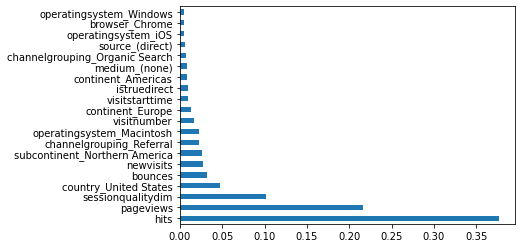

In [21]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')